The concentration of particulate matter (PM) in the atmosphere is typically modeled using a partial differential equation (PDE) that accounts for various physical processes affecting PM levels. Here's a breakdown of the key components and how they come together in the PDE:

1. Fundamental Principles

•	Conservation of Mass: The PDE is based on the principle of mass conservation, which states that the change in the amount of PM within a given volume is due to the difference between the rate at which PM enters and leaves that volume.

•	Advection: PM is transported by the bulk motion of the air, primarily by wind. This is known as advection.   

•	Diffusion: PM spreads out from areas of high concentration to areas of low concentration due to random molecular motion. This is called diffusion.   

•	Sources and Sinks: PM is emitted from various sources (e.g., vehicles, industrial processes) and removed from the atmosphere through processes like deposition (settling onto surfaces) and chemical reactions.


2. The Advection-Diffusion Equation
The general form of the PDE used to model PM concentration is the advection-diffusion equation:

∂C/∂t + u⋅∇C = ∇⋅(K⋅∇C) + S - L
Where:
•	C is the concentration of PM (e.g., in µg/m³)
•	t is time
•	u is the wind velocity vector (components in x, y, and z directions)
•	∇ is the gradient operator
•	K is the diffusion coefficient (accounts for turbulent mixing in the atmosphere)
•	S represents sources of PM
•	L represents sinks of PM

3. PM2.5 vs. PM10
The key difference between PM2.5 and PM10 lies in their size and how this affects their behavior in the atmosphere:

•	PM2.5 (Fine Particles): These particles have a diameter of 2.5 micrometers or less. They are more likely to be produced by combustion sources and can penetrate deeper into the lungs. Eg: combustion Sources  

•	PM10 (Coarse Particles): These particles have a diameter of 10 micrometers or less. They are often generated by mechanical processes like dust and grinding.   Eq: road dust

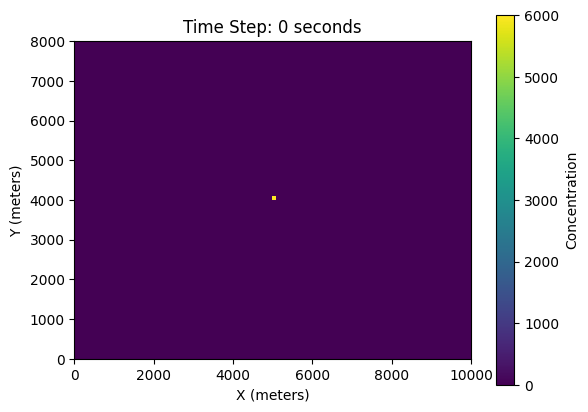

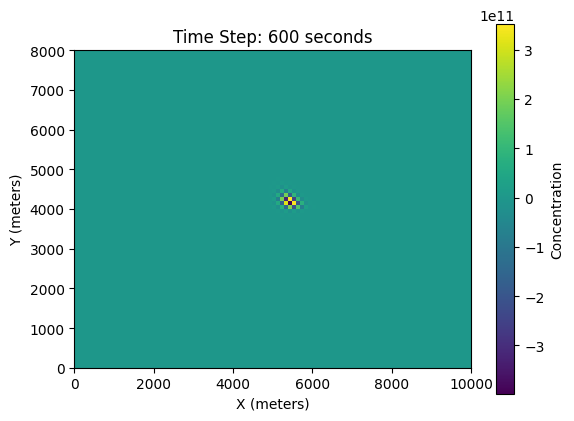

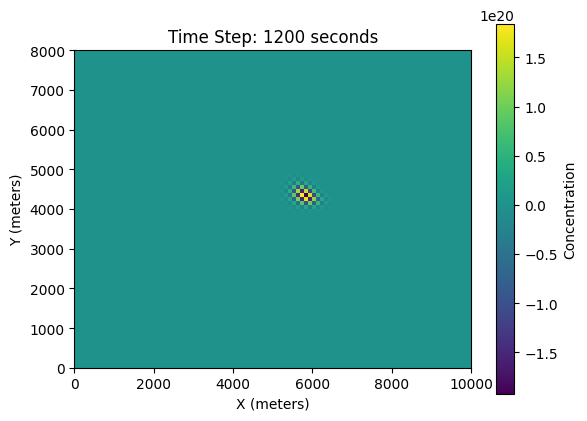

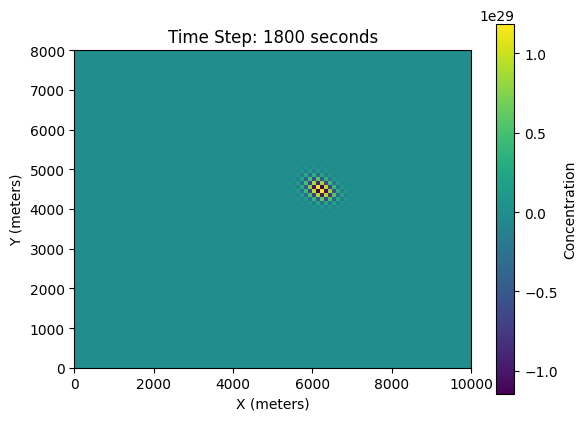

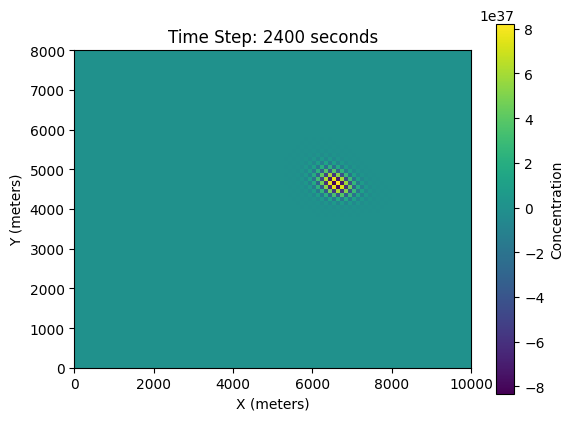

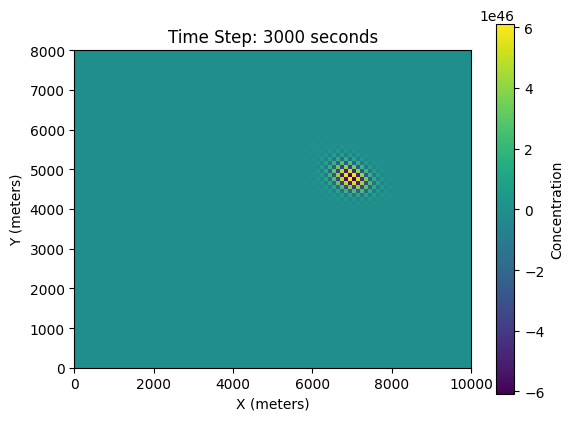

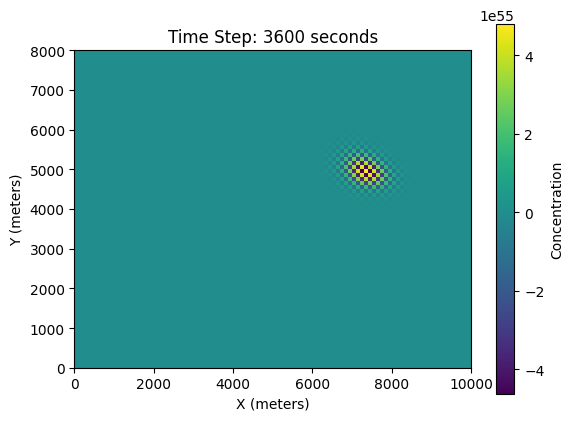

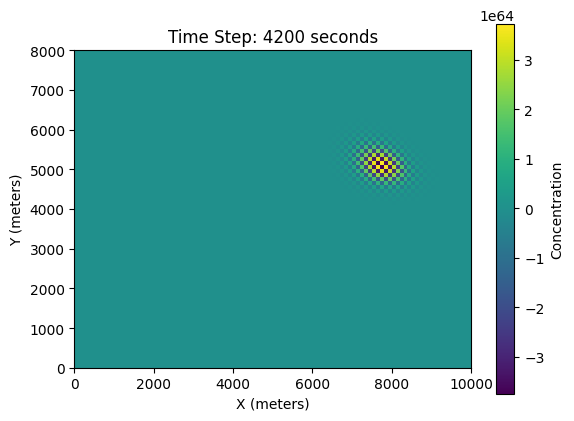

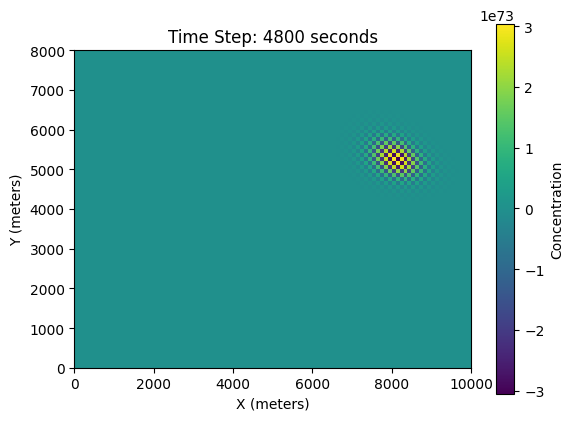

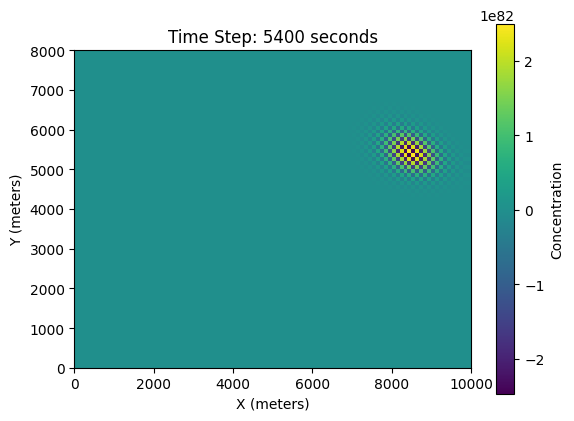

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants (example values - these should be based on your specific scenario)
nx = 100  # Number of grid points in x-direction
ny = 80   # Number of grid points in y-direction
dx = 100  # Grid spacing (meters)
dy = 100  # Grid spacing (meters)
dt = 60   # Time step (seconds)
K = 10    # Diffusion coefficient (m^2/s)
U = 5     # Wind speed in x-direction (m/s)
V = 2     # Wind speed in y-direction (m/s)

# Initialize concentration field (e.g., initially zero everywhere)
C = np.zeros((ny, nx))

# Source location and strength (example)
source_x = nx // 2
source_y = ny // 2
source_strength = 100  # Units: mass/time

# Time loop
nt = 100 # Number of time steps
for n in range(nt):
    # Create a copy of the concentration field for updating
    C_new = C.copy()

    # Loop through grid points
    for j in range(1, ny - 1):  # Exclude boundary cells for simplicity
        for i in range(1, nx - 1):
            # Advection terms (using upwind scheme for stability)
            adv_x = -U * (C[j, i] - C[j, i - 1]) / dx if U > 0 else -U * (C[j, i + 1] - C[j, i]) / dx
            adv_y = -V * (C[j, i] - C[j - 1, i]) / dy if V > 0 else -V * (C[j + 1, i] - C[j, i]) / dy

            # Diffusion terms (central difference)
            diff_x = K * (C[j, i + 1] - 2 * C[j, i] + C[j, i - 1]) / dx**2
            diff_y = K * (C[j + 1, i] - 2 * C[j, i] + C[j - 1, i]) / dy**2

            # Source term (add at source location)
            source = source_strength if i == source_x and j == source_y else 0

            # Update concentration (explicit scheme)
            C_new[j, i] = C[j, i] + dt * (adv_x + adv_y + diff_x + diff_y + source)

    # Apply boundary conditions (e.g., zero gradient or constant concentration)
    # (Example: zero gradient - reflecting boundary conditions)
    C_new[0, :] = C_new[1, :]
    C_new[-1, :] = C_new[-2, :]
    C_new[:, 0] = C_new[:, 1]
    C_new[:, -1] = C_new[:, -2]

    # Update concentration field
    C = C_new

    # Plotting (optional - to visualize the concentration field over time)
    if n % 10 == 0:  # Plot every 10 time steps
        plt.imshow(C, cmap='viridis', origin='lower', extent=[0, nx*dx, 0, ny*dy]) # Extent adds real-world coordinates
        plt.title(f"Time Step: {n*dt} seconds")
        plt.xlabel("X (meters)")
        plt.ylabel("Y (meters)")
        plt.colorbar(label="Concentration")
        plt.pause(0.01)  # Adjust for animation speed
        plt.clf()  # Clear the figure

plt.show() # Keep plot window open after the loop

1. Temperature

Heat Equation: This is the fundamental PDE for temperature diffusion:

∂T/∂t = α∇²T
Where:

T is temperature
t is time
α is thermal diffusivity
∇² is the Laplacian operator (represents spatial variation)
This equation describes how temperature changes over time and space due to heat conduction.

2. Pressure

Navier-Stokes Equations: These are a set of PDEs that describe fluid motion, and pressure is a key variable within them:

ρ(∂v/∂t + (v⋅∇)v) = -∇P + μ∇²v + ρg
Where:

ρ is fluid density
v is fluid velocity
t is time
P is pressure
μ is dynamic viscosity
g is acceleration due to gravity
These equations are complex, but they are fundamental to understanding how pressure changes in fluids (including air).

3. Humidity

Moisture Diffusion Equation: This equation is similar to the heat equation, but it describes the diffusion of moisture:

∂H/∂t = D∇²H
Where:

H is humidity
t is time
D is the diffusion coefficient for moisture
This equation shows how humidity spreads out over time due to diffusion.

4. Gases (VOCs, VSCs, NOx, SOx, CO, H2)

Advection-Diffusion Equation: This type of equation is often used to model the transport of gases in the atmosphere:

∂C/∂t + (v⋅∇)C = D∇²C + R
Where:

C is the concentration of the gas
t is time
v is the wind velocity
D is the diffusion coefficient for the gas
R represents sources or sinks of the gas (e.g., emissions, chemical reactions)
This equation takes into account both the movement of the gas due to wind (advection) and its spreading due to diffusion.

Coupling Terms:   introduce the correlations.  Here are some

Temperature and Humidity: The rate of evaporation (a source term for humidity) depends on temperature.  So, the humidity equation would have a source term that is a function of temperature.  Conversely, high humidity can affect the perceived temperature, although this is more of a psychrometric effect than a direct impact on the heat equation itself.

Temperature and Gas Concentrations: Chemical reaction rates (source/sink terms in the gas concentration equations) often depend on temperature.  So, the gas concentration equations would have source/sink terms that are functions of temperature.

Pressure and Temperature:  The ideal gas law (PV=nRT) provides a relationship between pressure, volume, temperature, and the amount of gas.  Changes in temperature can affect pressure, especially in a closed container.  In more complex scenarios involving fluid flow, the full Navier-Stokes equations would be needed, where temperature affects density and viscosity.

Particulate Matter and Gases:  Some gases can react to form particulate matter (secondary organic aerosol formation).  This would be a source term for the particulate matter equation and a sink term for the reacting gases.  Conversely, particulate matter can sometimes provide surfaces for gas-phase reactions.

